https://www.kaggle.com/code/gvalentini/crop-yield-prediction-in-r

In [5]:
library(tidyverse) # metapackage of all tidyverse packages

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
train_df <- read_csv(file = "crop-yield-prediction-challenge/crop_yield_train.csv")
glimpse(train_df)

Rows: 4800 Columns: 18
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): crop_type, region, season, field_id
dbl  (13): id, soil_ph, soil_moisture, avg_temperature, total_rainfall, fert...
date  (1): harvest_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 4,800
Columns: 18
$ id                   <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…
$ soil_ph              <dbl> 7.831719, 6.685905, 8.338307, 7.214680, 5.129093,…
$ soil_moisture        <dbl> 37.19273, 23.71568, 20.48140, 42.44650, 16.61482,…
$ avg_temperature      <dbl> 32.27030, 25.85220, 18.20259, 13.75865, 14.44496,…
$ total_rainfall       <dbl> 145.6278, 599.0054, 333.2477, 523.6107, 1005.9317…
$ fertilizer_amount    <dbl> 124.83003, 120.16843, 270.79911, 99.01359, 169.95…
$ pesticide_usage      <dbl> 11.13249041, 11.84617089, 10.58849717, 1.22223843…
$ sunlight_hours       <dbl> 1911.117, 2011.488, 1929.726, 2231.229, 2826.832,…
$ nitrogen_content     <dbl> 1.4451586, 0.5259834, 2.9961842, 2.6809286, 1.298…
$ phosphorus_content   <dbl> 0.6989383, 1.1377217, 1.0796805, 0.7642382, 1.487…
$ potassium_content    <dbl> 1.0743393, 1.7184538, 1.3866013, 0.8147461, 0.910…
$ irrigation_frequency <dbl> 3, 3, 5, 5, 3, 6, 2, 3, 2, 6, 1, 4, 6, 3, 5, 1, 6…
$ crop_type     

In [8]:
# Summary of numeric variables
train_df %>% select(-c(crop_type:field_id)) %>% summary()

       id          soil_ph      soil_moisture   avg_temperature
 Min.   :   0   Min.   :4.500   Min.   :10.01   Min.   :10.01  
 1st Qu.:1200   1st Qu.:5.486   1st Qu.:19.95   1st Qu.:16.37  
 Median :2400   Median :6.498   Median :29.46   Median :22.75  
 Mean   :2400   Mean   :6.489   Mean   :29.77   Mean   :22.61  
 3rd Qu.:3599   3rd Qu.:7.469   3rd Qu.:39.66   3rd Qu.:28.93  
 Max.   :4799   Max.   :8.499   Max.   :49.99   Max.   :35.00  
 total_rainfall   fertilizer_amount pesticide_usage     sunlight_hours
 Min.   : 100.1   Min.   : 50.05    Min.   :8.310e-05   Min.   :1001  
 1st Qu.: 397.7   1st Qu.:114.16    1st Qu.:3.704e+00   1st Qu.:1501  
 Median : 664.0   Median :174.80    Median :7.535e+00   Median :1994  
 Mean   : 664.9   Mean   :174.12    Mean   :7.504e+00   Mean   :1998  
 3rd Qu.: 938.9   3rd Qu.:233.62    3rd Qu.:1.122e+01   3rd Qu.:2511  
 Max.   :1199.9   Max.   :299.93    Max.   :1.500e+01   Max.   :2999  
 nitrogen_content phosphorus_content potassium_content 

Sure — let’s break down this line of R code:

```r
train_df %>% select(-c(crop_type:field_id)) %>% summary()
```

### 1. `%>%`

This is the **pipe operator** from the **dplyr** / **tidyverse**.
It means: *take the output of the left expression and pass it to the right expression.*

So we are starting with:

```
train_df
```

then passing it into `select(...)`, and then into `summary()`.

---

### 2. `select(-c(crop_type:field_id))`

`select()` chooses columns from a data frame.

* The **minus (-)** means **remove columns**.
* `c(...)` means “a list of variables.”
* `crop_type:field_id` means **all columns from `crop_type` through `field_id` (inclusive)**, based on their order in the dataframe.

So:

```
select(-c(crop_type:field_id))
```

means:

> Remove all columns from `crop_type` to `field_id`.

This relies on the columns appearing in the dataframe in that order.

---

### 3. `summary()`

`summary()` returns summary statistics for each column:

* For numeric columns: min, median, mean, max, etc.
* For factors: counts of each category.
* For characters: some info (like length, sometimes truncated).

So this step produces descriptive statistics **after the selected columns have been removed**.

---

### Putting It All Together

| Step                             | Action                                                    |
| -------------------------------- | --------------------------------------------------------- |
| `train_df`                       | Start with this data frame                                |
| `%>%`                            | pipe to next step                                         |
| `select(-c(crop_type:field_id))` | Remove a block of columns, from `crop_type` to `field_id` |
| `%>%`                            | pipe to next step                                         |
| `summary()`                      | Show summary statistics of the remaining columns          |

**In plain words:**

> Take `train_df`, drop the columns from `crop_type` to `field_id`, and then display summary statistics of the remaining columns.

---

### Example Visualization of Before/After

Suppose your dataframe columns are:

```
| crop_type | soil_type | rainfall | field_id | yield | region |
```

After `select(-c(crop_type:field_id))`, you're left with:

```
| yield | region |
```

And `summary()` will summarize just those remaining columns.

---

If you'd like, I can also:
✅ Show how to inspect which columns will be removed
✅ Show safer alternatives (so nothing breaks if order changes)
✅ Convert this into a teaching slide or cheat sheet


In [9]:
# Detect missing values
train_df %>% mutate(across(everything(), is.na)) %>% summarize(across(everything(), sum))

id,soil_ph,soil_moisture,avg_temperature,total_rainfall,fertilizer_amount,pesticide_usage,sunlight_hours,nitrogen_content,phosphorus_content,potassium_content,irrigation_frequency,crop_type,region,season,harvest_date,field_id,yield_tpha
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let’s break the code down step-by-step:

```r
train_df %>% 
  mutate(across(everything(), is.na)) %>% 
  summarize(across(everything(), sum))
```

---

## Step 1: `mutate(across(everything(), is.na))`

* `everything()` means **apply to all columns**.
* `across(..., is.na)` applies the function `is.na()` to each column.
* `is.na()` returns **TRUE** if the value is missing, **FALSE** otherwise.

So this step **converts every column into a TRUE/FALSE indicator** for missing values.

**Before:**

| A  | B  |
| -- | -- |
| 2  | NA |
| NA | 5  |

**After mutate:**

| A     | B     |
| ----- | ----- |
| FALSE | TRUE  |
| TRUE  | FALSE |

---

## Step 2: `summarize(across(everything(), sum))`

* `summarize()` collapses rows into a single row.
* `sum()` adds up the TRUE/FALSE values.
* In R, `TRUE` = 1 and `FALSE` = 0.

So summing the values gives the **number of missing values** in each column.

**After summarize:**

| A | B |
| - | - |
| 1 | 1 |

Meaning:

* Column `A` has 1 missing value.
* Column `B` has 1 missing value.

---

## Final Meaning (Plain English)

> This code counts **how many `NA` values each column has** in `train_df`.

The result is **one row** where each column contains the **number of missing values** in that column.

---

## Even Shorter Equivalent

You could write the same thing more compactly as:

```r
colSums(is.na(train_df))
```

---

If you want, I can now show:
✅ How to also compute **percent missing per column**
✅ Visualize missing data using `ggplot` or `naniar`
✅ Create a heatmap of missing patterns


In [10]:
train_df %>% is.na() %>% colSums()

id              soil_ph        soil_moisture 
                   0                    0                    0 
     avg_temperature       total_rainfall    fertilizer_amount 
                   0                    0                    0 
     pesticide_usage       sunlight_hours     nitrogen_content 
                   0                    0                    0 
  phosphorus_content    potassium_content irrigation_frequency 
                   0                    0                    0 
           crop_type               region               season 
                   0                    0                    0 
        harvest_date             field_id           yield_tpha 
                   0                    0                    0

In [11]:
colSums(is.na(train_df))

id              soil_ph        soil_moisture 
                   0                    0                    0 
     avg_temperature       total_rainfall    fertilizer_amount 
                   0                    0                    0 
     pesticide_usage       sunlight_hours     nitrogen_content 
                   0                    0                    0 
  phosphorus_content    potassium_content irrigation_frequency 
                   0                    0                    0 
           crop_type               region               season 
                   0                    0                    0 
        harvest_date             field_id           yield_tpha 
                   0                    0                    0

In [12]:
# Number of crops by region and season
train_df %>% count(region, season) %>% pivot    _wider(names_from = "season", values_from = "n")

region,Autumn,Spring,Summer
<chr>,<int>,<int>,<int>
Central,324,341,309
East,297,324,360
North,332,330,323
South,303,314,303
West,289,334,317


I'll explain this R code pipeline for you. Let me first check the context from your notebook.

[1 tool called]

Based on your notebook context, let me explain this R code that analyzes the distribution of crops by region and season:

```r
train_df %>% 
  count(region, season) %>% 
  pivot_wider(names_from = "season", values_from = "n")
```

## Step-by-Step Breakdown

### Step 1: `count(region, season)`

* `count()` is a **dplyr** function that groups by the specified columns and counts the number of observations in each group.
* It creates a new column called **`n`** containing the counts.

**What happens:**
- Groups data by every unique combination of `region` and `season`
- Counts how many rows exist for each combination
- Returns a data frame with columns: `region`, `season`, and `n`

**Example result (long format):**

| region | season | n   |
|--------|--------|-----|
| North  | Spring | 150 |
| North  | Summer | 200 |
| North  | Fall   | 180 |
| South  | Spring | 160 |
| South  | Summer | 190 |
| ...    | ...    | ... |

---

### Step 2: `pivot_wider(names_from = "season", values_from = "n")`

* `pivot_wider()` is a **tidyr** function that reshapes data from **long format to wide format**.
* `names_from = "season"` means: take unique values from the `season` column and turn them into **column names**.
* `values_from = "n"` means: fill those new columns with values from the `n` column.

**What happens:**
- Each unique season becomes its own column
- Each region gets one row
- The counts are spread across the season columns

**Example result (wide format):**

| region | Spring | Summer | Fall | Winter |
|--------|--------|--------|------|--------|
| North  | 150    | 200    | 180  | 170    |
| South  | 160    | 190    | 175  | 155    |
| East   | 140    | 210    | 165  | 145    |
| West   | 155    | 185    | 190  | 170    |

---

## Summary (Plain English)

> This code **counts how many crop records exist for each region-season combination**, then **reshapes the data** so that:
> - Each **region** is a row
> - Each **season** is a column  
> - The **counts** fill the cells

This makes it easy to compare seasonal patterns across regions at a glance.

---

## Alternative Approaches

You could achieve similar results with:

```r
# Using table (base R)
table(train_df$region, train_df$season)

# Using xtabs (base R)
xtabs(~ region + season, data = train_df)
```

But the `dplyr` + `tidyr` approach is more flexible for further data manipulation and integrates well with the tidyverse pipeline.

---

**Note:** There seems to be a space in your code: `pivot    _wider` — make sure it's `pivot_wider` (no space before underscore) for the code to run properly! 😊

In [13]:
table(train_df$region, train_df$season)

         
          Autumn Spring Summer
  Central    324    341    309
  East       297    324    360
  North      332    330    323
  South      303    314    303
  West       289    334    317

In [14]:
xtabs(~ region + season, data = train_df)

         season
region    Autumn Spring Summer
  Central    324    341    309
  East       297    324    360
  North      332    330    323
  South      303    314    303
  West       289    334    317

In [15]:
# Average crop yield by region and season
train_df %>% group_by(region, season) %>% 
    summarize(avg_yield = round(mean(yield_tpha), digits = 2)) %>% 
    pivot_wider(names_from = "season", values_from = "avg_yield")

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.


region,Autumn,Spring,Summer
<chr>,<dbl>,<dbl>,<dbl>
Central,6.24,6.23,6.26
East,6.24,6.42,6.28
North,6.20,6.34,6.41
South,6.28,6.12,6.29
West,6.23,6.26,6.20


Let me explain this R code that calculates and displays average crop yield by region and season:

```r
train_df %>% 
  group_by(region, season) %>% 
  summarize(avg_yield = round(mean(yield_tpha), digits = 2)) %>% 
  pivot_wider(names_from = "season", values_from = "avg_yield")
```

## Step-by-Step Breakdown

### Step 1: `group_by(region, season)`

* `group_by()` is a **dplyr** function that groups the data by the specified columns.
* This doesn't change how the data looks, but it tells R to perform subsequent operations **within each group**.

**What happens:**
- Data is organized into groups based on every unique combination of `region` and `season`
- Example groups: (North, Spring), (North, Summer), (South, Spring), etc.

---

### Step 2: `summarize(avg_yield = round(mean(yield_tpha), digits = 2))`

* `summarize()` collapses each group into a **single row** with summary statistics.
* `mean(yield_tpha)` calculates the **average** of the `yield_tpha` column for each group.
* `round(..., digits = 2)` rounds the result to **2 decimal places**.
* `avg_yield =` assigns this rounded average to a new column called `avg_yield`.

**What happens:**
- For each region-season combination, calculates the mean yield
- Rounds it to 2 decimal places
- Creates a long-format table

**Example result (long format):**

| region | season | avg_yield |
|--------|--------|-----------|
| North  | Spring | 45.67     |
| North  | Summer | 52.34     |
| North  | Fall   | 48.91     |
| South  | Spring | 50.12     |
| South  | Summer | 55.78     |
| ...    | ...    | ...       |

---

### Step 3: `pivot_wider(names_from = "season", values_from = "avg_yield")`

* `pivot_wider()` reshapes from **long format to wide format**.
* `names_from = "season"` means: unique season values become **column headers**.
* `values_from = "avg_yield"` means: fill those columns with the `avg_yield` values.

**What happens:**
- Each season becomes its own column
- Each region gets one row
- Average yields are spread across the season columns

**Example result (wide format):**

| region | Spring | Summer | Fall  | Winter |
|--------|--------|--------|-------|--------|
| North  | 45.67  | 52.34  | 48.91 | 43.22  |
| South  | 50.12  | 55.78  | 51.45 | 47.89  |
| East   | 48.33  | 54.21  | 49.67 | 45.11  |
| West   | 46.89  | 53.45  | 50.23 | 46.78  |

---

## Summary (Plain English)

> This code:
> 1. **Groups** the data by region and season
> 2. **Calculates** the average yield (in tonnes per hectare) for each group, rounded to 2 decimal places
> 3. **Reshapes** the data so regions are rows and seasons are columns, making it easy to compare seasonal yield patterns across regions

---

## Key Differences from the Previous Example

| Previous Code | This Code |
|--------------|-----------|
| `count()` - counts observations | `group_by() + summarize()` - calculates averages |
| Column: `n` (counts) | Column: `avg_yield` (averages) |
| Shows **how many crops** | Shows **average yield performance** |

---

## Why This Is Useful

This format makes it easy to:
- ✅ Compare which seasons produce the best yields in each region
- ✅ Identify regional patterns (e.g., "South has higher summer yields")
- ✅ Spot potential outliers or unusual patterns
- ✅ Create visualizations or reports from the wide-format table

---

## Alternative Approach (Base R)

```r
# Using aggregate and reshape
aggregate(yield_tpha ~ region + season, data = train_df, FUN = function(x) round(mean(x), 2))
```

But the tidyverse approach is more readable and easier to extend! 🌾

In [16]:
str(train_df)

spc_tbl_ [4,800 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                  : num [1:4800] 0 1 2 3 4 5 6 7 8 9 ...
 $ soil_ph             : num [1:4800] 7.83 6.69 8.34 7.21 5.13 ...
 $ soil_moisture       : num [1:4800] 37.2 23.7 20.5 42.4 16.6 ...
 $ avg_temperature     : num [1:4800] 32.3 25.9 18.2 13.8 14.4 ...
 $ total_rainfall      : num [1:4800] 146 599 333 524 1006 ...
 $ fertilizer_amount   : num [1:4800] 125 120 271 99 170 ...
 $ pesticide_usage     : num [1:4800] 11.13 11.85 10.59 1.22 6.35 ...
 $ sunlight_hours      : num [1:4800] 1911 2011 1930 2231 2827 ...
 $ nitrogen_content    : num [1:4800] 1.445 0.526 2.996 2.681 1.299 ...
 $ phosphorus_content  : num [1:4800] 0.699 1.138 1.08 0.764 1.488 ...
 $ potassium_content   : num [1:4800] 1.074 1.718 1.387 0.815 0.91 ...
 $ irrigation_frequency: num [1:4800] 3 3 5 5 3 6 2 3 2 6 ...
 $ crop_type           : chr [1:4800] "Soybean" "Soybean" "Soybean" "Corn" ...
 $ region              : chr [1:4800] "South" "South" "Nort

In [17]:
# Calculate correlation between numeric variables
train_df %>% select(-c(id, crop_type:field_id)) %>% 
    cor() %>% round(digits = 2)

,soil_ph,soil_moisture,avg_temperature,total_rainfall,fertilizer_amount,pesticide_usage,sunlight_hours,nitrogen_content,phosphorus_content,potassium_content,irrigation_frequency,yield_tpha
soil_ph,1.00,-0.01,-0.01,0.01,0.01,0.00,-0.01,0.00,-0.02,0.00,0.01,0.02
soil_moisture,-0.01,1.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,-0.02,0.06
avg_temperature,-0.01,0.00,1.00,0.00,0.02,0.02,0.00,0.00,0.02,0.02,0.00,-0.04
total_rainfall,0.01,0.01,0.00,1.00,0.01,-0.01,-0.01,0.01,0.00,-0.01,0.01,0.19
fertilizer_amount,0.01,0.00,0.02,0.01,1.00,-0.02,0.02,0.00,0.02,0.00,0.00,0.76
pesticide_usage,0.00,0.01,0.02,-0.01,-0.02,1.00,-0.01,0.00,-0.01,0.00,-0.02,-0.26
sunlight_hours,-0.01,0.01,0.00,-0.01,0.02,-0.01,1.00,0.00,-0.01,-0.01,-0.02,0.04
nitrogen_content,0.00,0.00,0.00,0.01,0.00,0.00,0.00,1.00,0.03,-0.01,-0.01,0.06
phosphorus_content,-0.02,0.00,0.02,0.00,0.02,-0.01,-0.01,0.03,1.00,0.00,0.00,0.04
potassium_content,0.00,0.01,0.02,-0.01,0.00,0.00,-0.01,-0.01,0.00,1.00,-0.01,0.05


In [23]:
# Set plotting options
options(repr.plot.height = 10, repr.plot.width = 16)

theme_gvalentini <- theme_bw() + 
    theme(axis.text = element_text(size = 14), axis.title = element_text(size = 16), 
    legend.position = "right", legend.text = element_text(size = 14), legend.title = element_text(size = 14), 
    plot.title = element_text(size = 18.5), plot.caption = element_text(size = 10.5), 
    strip.text = element_text(size = 16, face = "bold"), 
    plot.background = element_rect(fill = "lightblue"))

gv_caption <- "Made by gvalentini/Kaggle"

Let me explain this R code that sets up custom plotting configurations and a personalized ggplot2 theme:

```r
options(repr.plot.height = 10, repr.plot.width = 16)

theme_gvalentini <- theme_bw() + 
    theme(axis.text = element_text(size = 14), axis.title = element_text(size = 16), 
    legend.position = "right", legend.text = element_text(size = 14), legend.title = element_text(size = 14), 
    plot.title = element_text(size = 18.5), plot.caption = element_text(size = 10.5), 
    strip.text = element_text(size = 16, face = "bold"), 
    plot.background = element_rect(fill = "lightblue"))

gv_caption <- "Made by gvalentini/Kaggle"
```

## Part 1: `options(repr.plot.height = 10, repr.plot.width = 16)`

* `options()` sets **global R options** that affect behavior.
* `repr.plot.height` and `repr.plot.width` control **plot dimensions in Jupyter notebooks**.
* These are measured in **inches**.

**What it does:**
- Sets default plot size to **10 inches tall** and **16 inches wide**
- Only works in **Jupyter/IRkernel** environments (like your `.ipynb` notebook)
- Makes plots larger and wider than default for better visibility

---

## Part 2: `theme_gvalentini` - Custom ggplot2 Theme

This creates a **reusable custom theme** for ggplot2 visualizations by:
1. Starting with `theme_bw()` (black and white theme)
2. Adding custom modifications with `theme()`

Let me break down each customization:

### Text Elements

| Parameter | Setting | Effect |
|-----------|---------|--------|
| `axis.text = element_text(size = 14)` | Size 14 | Axis labels (numbers/categories on axes) |
| `axis.title = element_text(size = 16)` | Size 16 | Axis titles (x-axis and y-axis labels) |
| `plot.title = element_text(size = 18.5)` | Size 18.5 | Main plot title |
| `plot.caption = element_text(size = 10.5)` | Size 10.5 | Caption text at bottom |
| `strip.text = element_text(size = 16, face = "bold")` | Size 16, bold | Facet labels (when using faceting) |

### Legend Settings

| Parameter | Setting | Effect |
|-----------|---------|--------|
| `legend.position = "right"` | Right side | Places legend on right (default, but explicit) |
| `legend.text = element_text(size = 14)` | Size 14 | Legend item labels |
| `legend.title = element_text(size = 14)` | Size 14 | Legend title |

### Background

| Parameter | Setting | Effect |
|-----------|---------|--------|
| `plot.background = element_rect(fill = "lightblue")` | Light blue | Entire plot background is light blue |

---

## Part 3: `gv_caption <- "Made by gvalentini/Kaggle"`

* Creates a **string variable** for attribution.
* Can be reused across multiple plots using `labs(caption = gv_caption)`.

---

## How to Use This Theme

Once defined, you can apply it to any ggplot:

```r
# Example usage
ggplot(train_df, aes(x = region, y = yield_tpha)) +
  geom_boxplot() +
  labs(
    title = "Crop Yield by Region",
    x = "Region",
    y = "Yield (tonnes per hectare)",
    caption = gv_caption
  ) +
  theme_gvalentini  # Apply the custom theme
```

---

## Why Create a Custom Theme?

✅ **Consistency**: All plots have the same style  
✅ **Reusability**: Write once, use everywhere  
✅ **Branding**: Creates a recognizable visual identity  
✅ **Efficiency**: Don't repeat styling code in every plot  
✅ **Readability**: Larger text sizes for presentations/reports  

---

## Visual Hierarchy Created

From largest to smallest text:
1. **Plot Title** (18.5) - Most prominent
2. **Axis Titles** (16) & **Facet Labels** (16, bold)
3. **Axis Text** (14), **Legend** (14)
4. **Caption** (10.5) - Smallest, least prominent

This creates a clear visual hierarchy that guides the reader's eye! 📊

---

## Fun Fact

The light blue background (`plot.background`) is applied to the **entire plot area**, including margins. If you only wanted to color the panel (data area), you'd use `panel.background = element_rect(fill = "lightblue")` instead.

`geom_smooth()` using formula = 'y ~ x'


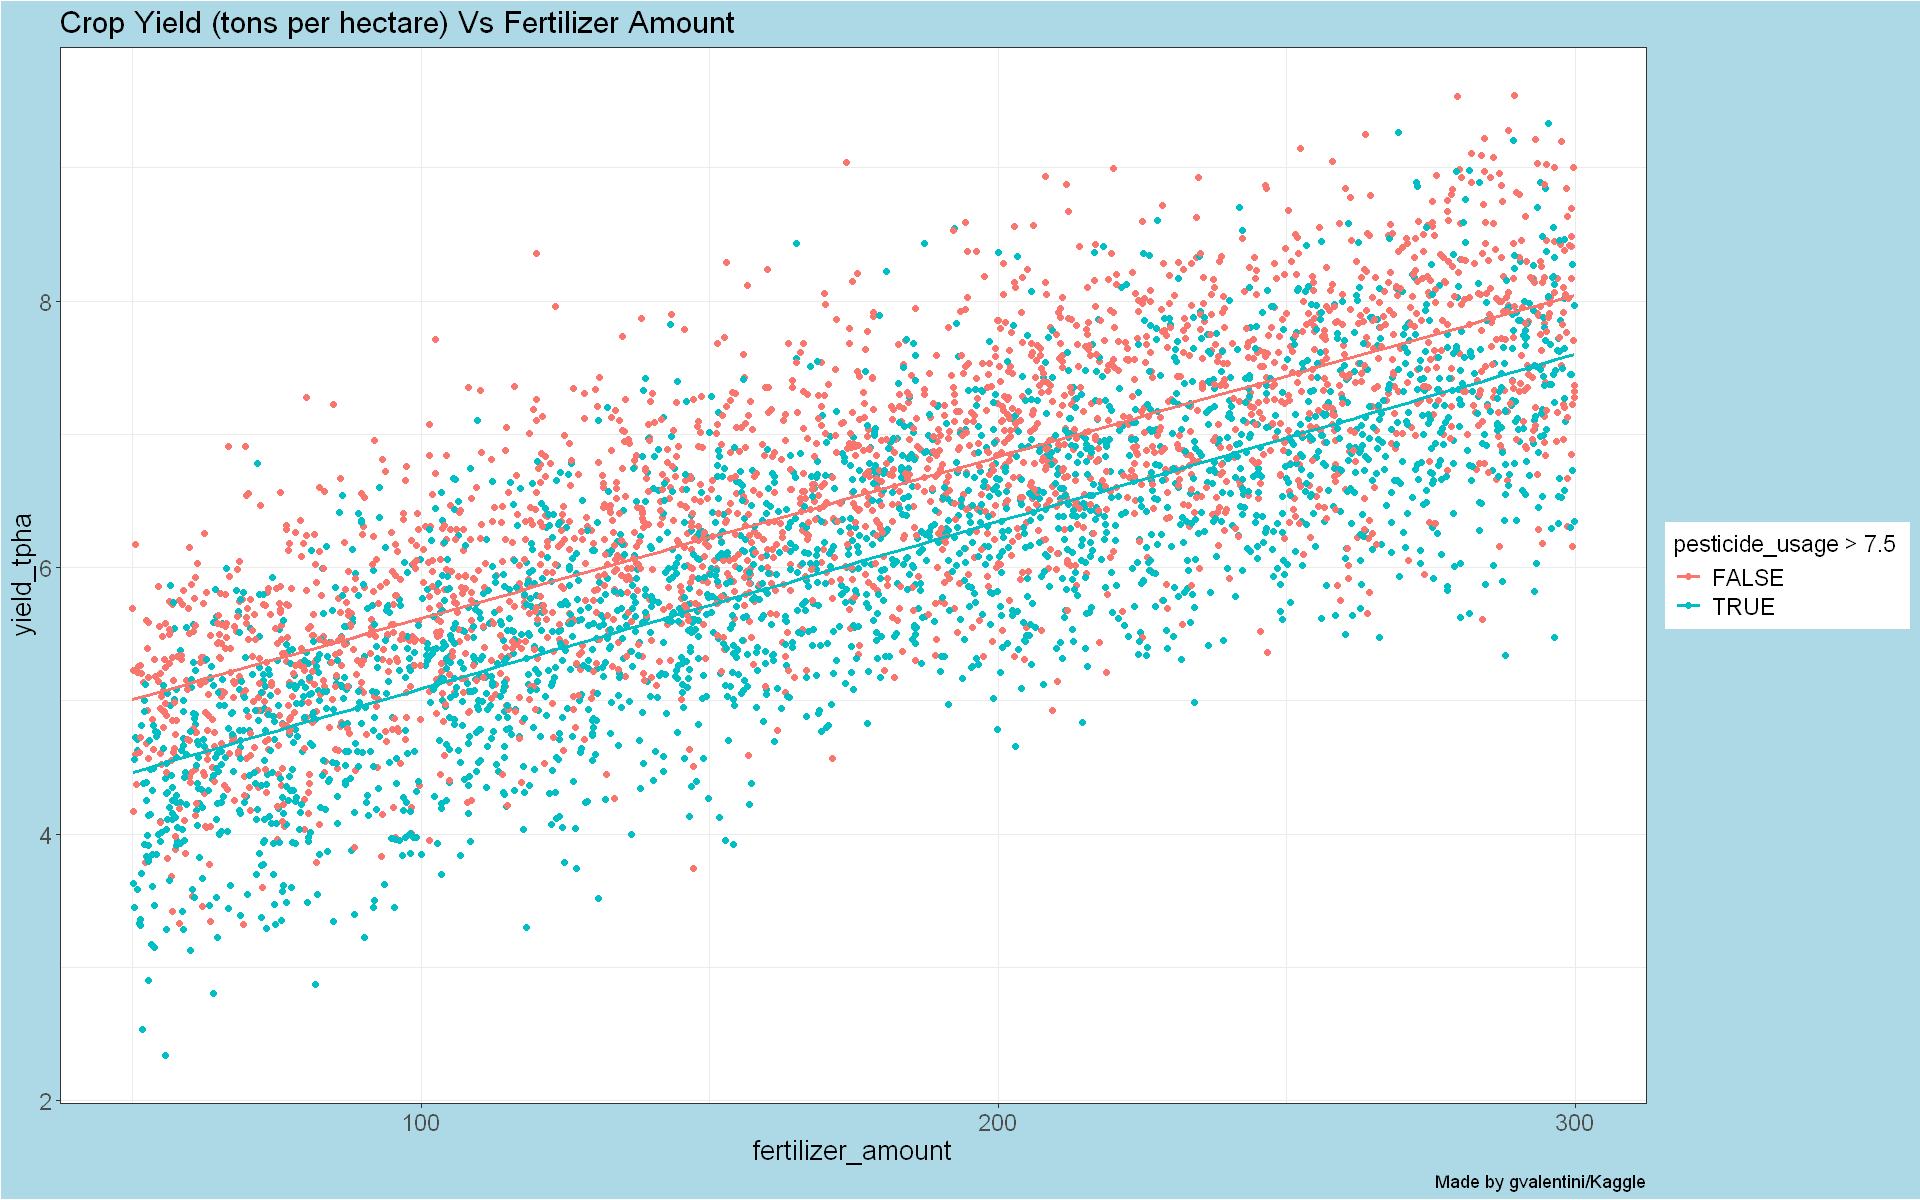

In [24]:
# Scatterplot of yield_tpha vs fertilizer_amount
train_df %>% ggplot(aes(x = fertilizer_amount, y = yield_tpha, group = pesticide_usage > 7.5)) + 
    geom_point(aes(color = pesticide_usage > 7.5)) + 
    geom_smooth(method = "lm", se = FALSE, aes(color = pesticide_usage > 7.5)) + 
    labs(title = "Crop Yield (tons per hectare) Vs Fertilizer Amount", caption = gv_caption) + 
    theme_gvalentini

Let me explain this ggplot2 code that creates a sophisticated scatterplot analyzing the relationship between fertilizer and crop yield, with grouping based on pesticide usage:

```r
train_df %>% 
  ggplot(aes(x = fertilizer_amount, y = yield_tpha, group = pesticide_usage > 7.5)) + 
  geom_point(aes(color = pesticide_usage > 7.5)) + 
  geom_smooth(method = "lm", se = FALSE, aes(color = pesticide_usage > 7.5)) + 
  labs(title = "Crop Yield (tons per hectare) Vs Fertilizer Amount", caption = gv_caption) + 
  theme_gvalentini
```

## Step-by-Step Breakdown

### Step 1: `train_df %>% ggplot(...)`

* Uses the **pipe operator** to pass `train_df` into ggplot
* Initializes a ggplot object

---

### Step 2: `aes(x = fertilizer_amount, y = yield_tpha, group = pesticide_usage > 7.5)`

The **aesthetic mappings** that define what data maps to visual properties:

| Aesthetic | Mapping | Meaning |
|-----------|---------|---------|
| `x` | `fertilizer_amount` | Fertilizer amount on x-axis |
| `y` | `yield_tpha` | Yield (tonnes per hectare) on y-axis |
| `group` | `pesticide_usage > 7.5` | Split data into 2 groups: TRUE (high pesticide) and FALSE (low pesticide) |

**Key insight:** `pesticide_usage > 7.5` is a **logical condition** that creates **two groups**:
- **TRUE**: Records where pesticide usage is **above 7.5**
- **FALSE**: Records where pesticide usage is **7.5 or below**

---

### Step 3: `geom_point(aes(color = pesticide_usage > 7.5))`

* `geom_point()` adds **scatter points** to the plot.
* `aes(color = pesticide_usage > 7.5)` colors points based on the grouping:
  - One color for high pesticide usage (TRUE)
  - Another color for low pesticide usage (FALSE)

**Visual effect:** You'll see two distinct colors of points representing the two pesticide groups.

---

### Step 4: `geom_smooth(method = "lm", se = FALSE, aes(color = pesticide_usage > 7.5))`

Adds **trend lines** to show the relationship between fertilizer and yield:

| Parameter | Setting | Effect |
|-----------|---------|--------|
| `method = "lm"` | Linear model | Fits a **straight line** (linear regression) |
| `se = FALSE` | No standard error | **Hides** the confidence interval shading |
| `aes(color = pesticide_usage > 7.5)` | Color by group | Creates **two separate trend lines** (one per group) with matching colors |

**Visual effect:** Two colored lines showing the fertilizer-yield relationship for each pesticide usage group.

---

### Step 5: `labs(title = "...", caption = gv_caption)`

* `labs()` sets **labels** for the plot.
* `title` sets the main title
* `caption = gv_caption` uses the previously defined variable ("Made by gvalentini/Kaggle")

---

### Step 6: `theme_gvalentini`

* Applies the **custom theme** created earlier
* Gives consistent styling (text sizes, light blue background, etc.)

---

## What This Plot Shows

This visualization answers the question:

> **"Does the relationship between fertilizer amount and crop yield differ based on pesticide usage levels?"**

### The Analysis Strategy:
1. **Splits** data into two groups based on pesticide threshold (7.5)
2. **Colors** both points and trend lines to distinguish groups
3. **Compares** whether high vs. low pesticide usage affects the fertilizer-yield relationship

---

## Possible Insights You Might See

The plot could reveal patterns like:

| Pattern | Interpretation |
|---------|----------------|
| **Parallel lines** | Fertilizer has similar effect regardless of pesticide use |
| **Different slopes** | Fertilizer effectiveness depends on pesticide level |
| **One line steeper** | One group responds better to fertilizer |
| **Lines cross** | Optimal strategy changes at certain fertilizer levels |

---

## Why Use `group` in the Main `aes()` and `color` in the Layers?

This is a **subtle but important distinction**:

- **`group` in main `aes()`**: Tells ggplot to **separate data** for calculations (like separate regression lines)
- **`color` in layer `aes()`**: Actually **colors** the visual elements

**Note:** You could simplify by putting `color` in the main `aes()` instead:

```r
# Equivalent simplified version
train_df %>% 
  ggplot(aes(x = fertilizer_amount, y = yield_tpha, color = pesticide_usage > 7.5)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE) + 
  labs(title = "Crop Yield (tons per hectare) Vs Fertilizer Amount", caption = gv_caption) + 
  theme_gvalentini
```

When you put `color` in the main `aes()`, it automatically creates groups too!

---

## Legend

The plot will automatically include a legend showing:
- **FALSE** (or similar): Low pesticide usage (≤ 7.5)
- **TRUE** (or similar): High pesticide usage (> 7.5)

You could make the legend clearer with:

```r
labs(color = "High Pesticide\n(> 7.5)")
```

This creates better agricultural insights by revealing how different farming practices interact! 🌾📈

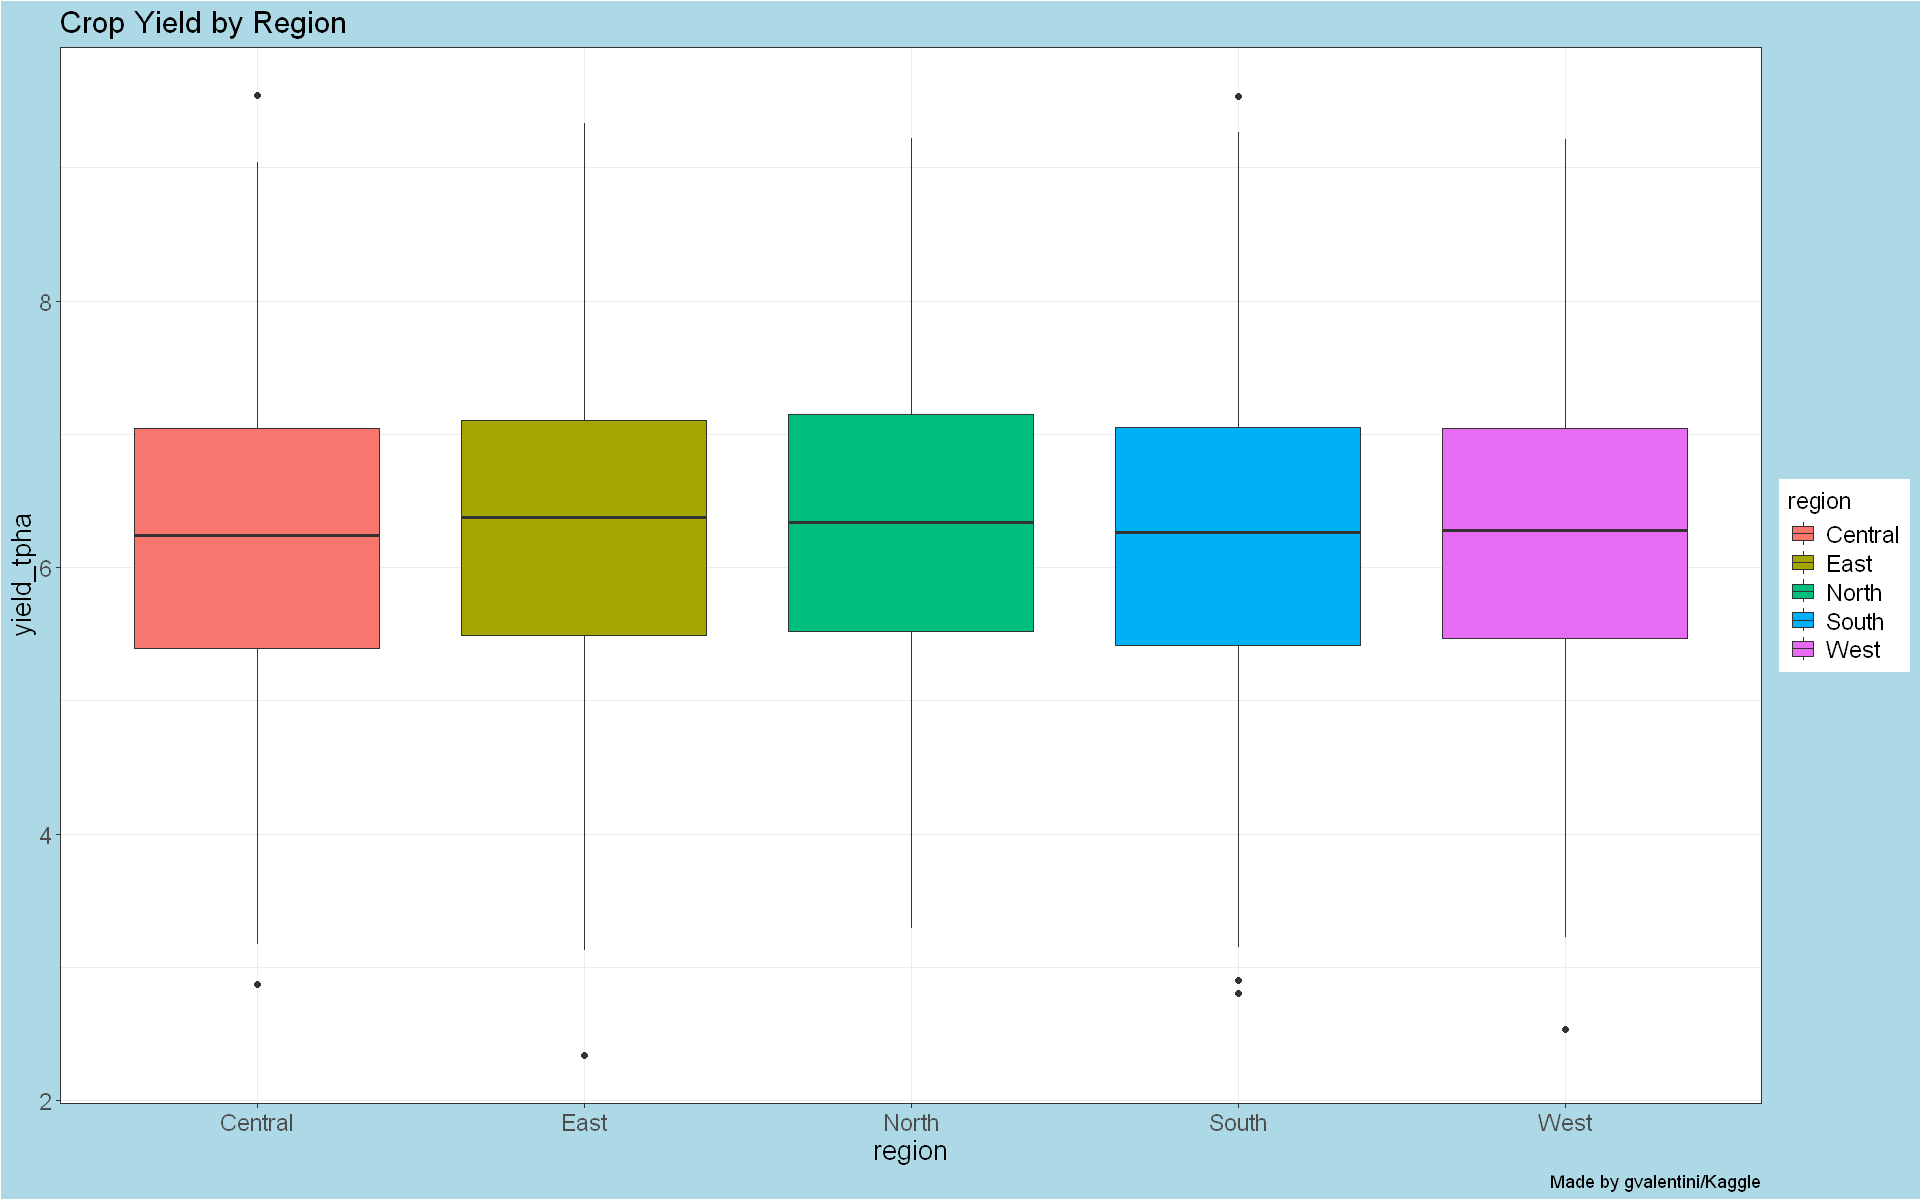

In [25]:
# Boxplot of crop yield by region
train_df %>% ggplot(aes(x = region, y = yield_tpha, fill = region)) + geom_boxplot() + 
    labs(title = "Crop Yield by Region", caption = gv_caption) + 
    theme_gvalentini

Let me explain this ggplot2 code that creates a boxplot to compare crop yields across different regions:

```r
train_df %>% 
  ggplot(aes(x = region, y = yield_tpha, fill = region)) + 
  geom_boxplot() + 
  labs(title = "Crop Yield by Region", caption = gv_caption) + 
  theme_gvalentini
```

## Step-by-Step Breakdown

### Step 1: `train_df %>% ggplot(...)`

* Uses the **pipe operator** to pass `train_df` into ggplot
* Initializes the plot with the training data

---

### Step 2: `aes(x = region, y = yield_tpha, fill = region)`

The **aesthetic mappings** define what data maps to visual properties:

| Aesthetic | Mapping | Effect |
|-----------|---------|--------|
| `x = region` | Region on x-axis | Each region gets its own position on x-axis |
| `y = yield_tpha` | Yield on y-axis | Yield values determine vertical position |
| `fill = region` | Fill color by region | Each region gets a **different fill color** inside the box |

**Key point:** Since `fill = region` matches `x = region`, each boxplot will have a **unique color**, making it easy to distinguish regions visually.

---

### Step 3: `geom_boxplot()`

* `geom_boxplot()` creates **box-and-whisker plots**.
* One boxplot is drawn for each unique value in the `x` aesthetic (each region).

**What a boxplot shows:**

```
    *  <- outlier (individual points beyond whiskers)
    |
    ┬  <- upper whisker (max value within 1.5×IQR from Q3)
    │
   ┌┴┐
   │ │ <- box (Q1 to Q3, contains middle 50% of data)
   │─│ <- median line (50th percentile)
   └┬┘
    │
    ┴  <- lower whisker (min value within 1.5×IQR from Q1)
    |
    *  <- outlier
```

| Component | What It Shows |
|-----------|---------------|
| **Box** | Interquartile range (IQR) - middle 50% of data |
| **Line in box** | Median (50th percentile) |
| **Whiskers** | Extend to min/max within 1.5×IQR |
| **Individual points** | Outliers beyond whiskers |

---

### Step 4: `labs(title = "Crop Yield by Region", caption = gv_caption)`

* Sets the **plot title** to "Crop Yield by Region"
* Adds the **caption** at the bottom (from the previously defined variable: "Made by gvalentini/Kaggle")

---

### Step 5: `theme_gvalentini`

* Applies your **custom theme** with:
  - Larger text sizes for readability
  - Light blue background
  - Consistent styling

---

## What This Plot Reveals

This visualization helps you understand **yield distribution and variability by region**:

### Questions It Answers:

1. **Which region has the highest median yield?** 
   - Look at the middle line in each box

2. **Which region has the most consistent yields?**
   - Narrower box = less variability = more consistent

3. **Which region has the most variable yields?**
   - Wider box = more variability = less predictable

4. **Are there outliers in certain regions?**
   - Individual points beyond whiskers indicate unusual yields

5. **Do regions have similar yield ranges?**
   - Compare box heights and whisker lengths

---

## Example Interpretation

If you saw something like this:

| Region | Observation |
|--------|-------------|
| **North** | Median ~48, tight box | → Consistent mid-range yields |
| **South** | Median ~52, wider box | → High yields but variable |
| **East** | Median ~45, many outliers | → Lower yields with exceptions |
| **West** | Median ~50, narrow box | → Reliable high yields |

**Insight:** West might be the most reliable region for predictable high yields! 🌾

---

## Why Use `fill = region`?

The `fill` aesthetic serves two purposes:

1. **Visual distinction**: Each region has its own color, making them easy to identify
2. **Aesthetic appeal**: Colored boxes are more engaging than all-gray boxes
3. **Accessibility**: Color coding helps quick visual scanning

---

## Optional Enhancement

If you want to remove the redundant legend (since x-axis already labels regions), you could add:

```r
theme_gvalentini + theme(legend.position = "none")
```

This makes the plot cleaner since the region names are already on the x-axis! 📊

---

## Statistical Context

This is one of the most common **exploratory data analysis (EDA)** visualizations because boxplots efficiently show:
- ✅ Central tendency (median)
- ✅ Spread (IQR)
- ✅ Skewness (asymmetric box)
- ✅ Outliers (unusual values)

All in one compact visualization! 📈

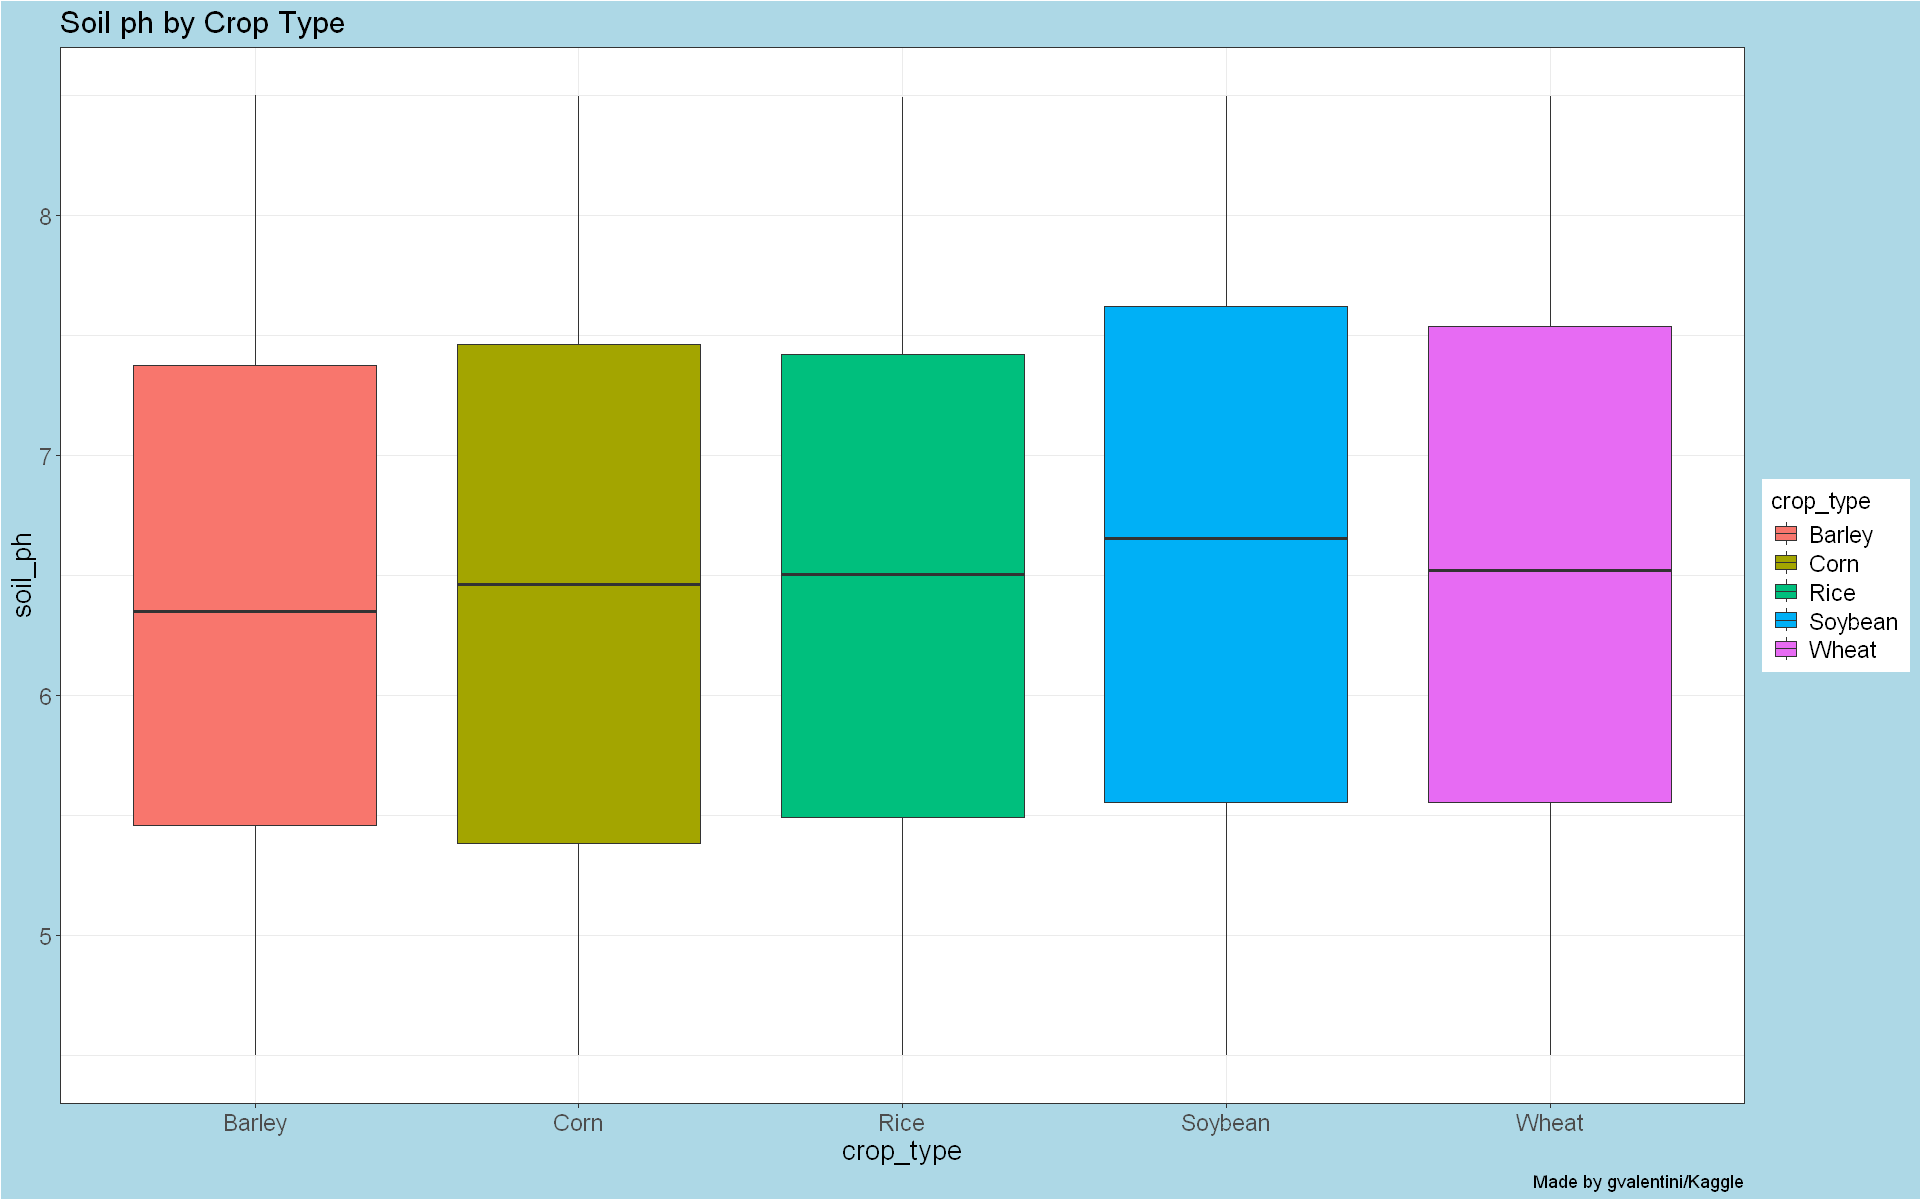

In [26]:
# Boxplot of soil_ph by crop_type
train_df %>% ggplot(aes(x = crop_type, y = soil_ph, fill = crop_type)) + geom_boxplot() + 
    labs(title = "Soil ph by Crop Type", caption = gv_caption) + 
    theme_gvalentini

In [27]:
model_1 <- lm(formula = yield_tpha ~ fertilizer_amount, data = train_df)
summary(model_1)


Call:
lm(formula = yield_tpha ~ fertilizer_amount, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.46003 -0.49188  0.00201  0.50406  2.78183 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.104302   0.028385  144.60   <2e-16 ***
fertilizer_amount 0.012418   0.000151   82.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7426 on 4798 degrees of freedom
Multiple R-squared:  0.5852,	Adjusted R-squared:  0.5851 
F-statistic:  6768 on 1 and 4798 DF,  p-value: < 2.2e-16


Let me explain this R code that creates and summarizes a simple linear regression model:

```r
model_1 <- lm(formula = yield_tpha ~ fertilizer_amount, data = train_df)
summary(model_1)
```

## Part 1: `lm(formula = yield_tpha ~ fertilizer_amount, data = train_df)`

### What `lm()` Does

* `lm()` stands for **Linear Model**
* It performs **linear regression** to find the relationship between variables
* The result is stored in `model_1` for later use

---

### Understanding the Formula: `yield_tpha ~ fertilizer_amount`

The **`~` (tilde)** is R's formula notation:

```
response ~ predictor
```

| Part | Variable | Role |
|------|----------|------|
| **Left side** | `yield_tpha` | **Response/Dependent** variable (what you're trying to predict) |
| **Right side** | `fertilizer_amount` | **Predictor/Independent** variable (what you're using to predict) |

**In plain English:** 
> "Model yield as a function of fertilizer amount"

---

### The Mathematical Model

This creates the equation:

```
yield_tpha = β₀ + β₁ × fertilizer_amount + ε
```

Where:
- **β₀** (beta-zero) = **Intercept** (predicted yield when fertilizer = 0)
- **β₁** (beta-one) = **Slope** (change in yield per unit increase in fertilizer)
- **ε** (epsilon) = **Error term** (unexplained variation)

---

## Part 2: `summary(model_1)`

The `summary()` function provides detailed statistical output. Let me explain what you'll see:

### 1. **Call**
Shows the model formula you specified.

```
Call:
lm(formula = yield_tpha ~ fertilizer_amount, data = train_df)
```

---

### 2. **Residuals**
Summary statistics of the prediction errors:

```
Residuals:
    Min      1Q   Median      3Q     Max 
-XX.XXX  -X.XXX   X.XXX   X.XXX  XX.XXX
```

**What it means:**
- **Residual** = Actual value - Predicted value
- Ideally, the median should be close to 0
- 1Q and 3Q show the spread of errors

---

### 3. **Coefficients Table** (Most Important!)

```
Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          XX.XXX     X.XXX    XX.XX   <2e-16 ***
fertilizer_amount     X.XXX     X.XXX    XX.XX   <2e-16 ***
```

| Column | Meaning |
|--------|---------|
| **Estimate** | The **actual coefficient values** (β₀ and β₁) |
| **Std. Error** | Uncertainty in the estimate |
| **t value** | Test statistic (Estimate / Std. Error) |
| **Pr(>\|t\|)** | **P-value** - probability the coefficient is actually zero |

**Significance codes:**
- `***` = p < 0.001 (highly significant)
- `**` = p < 0.01 (very significant)
- `*` = p < 0.05 (significant)
- `.` = p < 0.1 (marginally significant)
- (blank) = not significant

---

### 4. **Residual Standard Error**

```
Residual standard error: X.XXX on XXXX degrees of freedom
```

**What it means:**
- Average distance of actual values from the regression line
- Lower = better fit
- Measured in the same units as your response variable (tonnes per hectare)

---

### 5. **R-squared Values**

```
Multiple R-squared:  0.XXXX,  Adjusted R-squared:  0.XXXX
```

**R-squared (R²)**: The **proportion of variance explained** by the model

| R² Value | Interpretation |
|----------|----------------|
| 0.00 | Model explains 0% of variance (useless) |
| 0.25 | Explains 25% of variance (weak) |
| 0.50 | Explains 50% of variance (moderate) |
| 0.75 | Explains 75% of variance (strong) |
| 1.00 | Explains 100% of variance (perfect fit) |

**Adjusted R²**: Penalizes for adding more predictors (more relevant for multiple regression)

---

### 6. **F-statistic**

```
F-statistic: XXX.X on 1 and XXXX DF,  p-value: < 2.2e-16
```

**What it tests:**
- **Null hypothesis**: The model is no better than just using the mean
- Low p-value (< 0.05) = model is statistically significant overall

---

## Example Interpretation

Suppose the output shows:

```
Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          45.20      0.35    129.1   <2e-16 ***
fertilizer_amount     0.03      0.002    15.0   <2e-16 ***

Multiple R-squared:  0.045
```

**How to read this:**

1. **Equation**: `yield = 45.20 + 0.03 × fertilizer_amount`

2. **Intercept (45.20)**: When fertilizer = 0, predicted yield = 45.20 tonnes/hectare

3. **Slope (0.03)**: Each additional unit of fertilizer increases yield by 0.03 tonnes/hectare

4. **Significance (***)**:  Both coefficients are highly significant (not due to chance)

5. **R² (0.045)**: The model explains only 4.5% of yield variation
   - This suggests fertilizer alone is a **weak predictor**
   - You'd need to add more variables for better predictions

---

## What This Tells You

This simple model helps you understand:

✅ **Is there a relationship?** (Check p-value)  
✅ **How strong is it?** (Check R²)  
✅ **What's the direction?** (Positive or negative slope)  
✅ **What's the magnitude?** (Size of the slope coefficient)  

---

## Next Steps in Your Analysis

Since this is `model_1`, you're likely building a series of progressively complex models:

- **model_1**: Single predictor (fertilizer only)
- **model_2**: Multiple predictors (fertilizer + pesticide + ...)
- **model_3**: With interactions or transformations

This is great practice for **model building and comparison**! 🔬📊

In [28]:
model_2 <- lm(formula = yield_tpha ~ fertilizer_amount + pesticide_usage, data = train_df)
summary(model_2)


Call:
lm(formula = yield_tpha ~ fertilizer_amount + pesticide_usage, 
    data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57718 -0.45755  0.01031  0.45985  2.52978 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.6021274  0.0318075   144.7   <2e-16 ***
fertilizer_amount  0.0123267  0.0001401    88.0   <2e-16 ***
pesticide_usage   -0.0642197  0.0023018   -27.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6889 on 4797 degrees of freedom
Multiple R-squared:  0.6431,	Adjusted R-squared:  0.6429 
F-statistic:  4321 on 2 and 4797 DF,  p-value: < 2.2e-16


In [29]:
model_3 <- lm(formula = yield_tpha ~ fertilizer_amount + pesticide_usage + total_rainfall, data = train_df)
summary(model_3)


Call:
lm(formula = yield_tpha ~ fertilizer_amount + pesticide_usage + 
    total_rainfall, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24978 -0.43490 -0.00582  0.43776  2.43222 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.165e+00  3.609e-02  115.39   <2e-16 ***
fertilizer_amount  1.229e-02  1.334e-04   92.13   <2e-16 ***
pesticide_usage   -6.395e-02  2.192e-03  -29.18   <2e-16 ***
total_rainfall     6.647e-04  2.986e-05   22.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6559 on 4796 degrees of freedom
Multiple R-squared:  0.6765,	Adjusted R-squared:  0.6763 
F-statistic:  3343 on 3 and 4796 DF,  p-value: < 2.2e-16


In [30]:
# Make predictions on the train data
predicted_yield <- predict(object = model_3, data = train_df)

# Calculate the root mean squared error RMSE
RMSE <- sqrt(mean((train_df$yield_tpha - predicted_yield)^2))
print(RMSE)

[1] 0.6556144


Let me explain what RMSE means and how to interpret it in your crop yield prediction context:

## Understanding the Code

```r
# Make predictions on the train data
predicted_yield <- predict(object = model_3, data = train_df)

# Calculate the root mean squared error RMSE
RMSE <- sqrt(mean((train_df$yield_tpha - predicted_yield)^2))

print(RMSE)
```

### Step-by-Step Calculation

1. **`train_df$yield_tpha - predicted_yield`**
   - Calculates the **error** (residual) for each observation
   - Error = Actual value - Predicted value

2. **`(...)^2`**
   - Squares each error
   - Makes all errors positive and penalizes large errors more heavily

3. **`mean(...)`**
   - Calculates the **Mean Squared Error (MSE)**
   - Average of all squared errors

4. **`sqrt(...)`**
   - Takes the square root
   - Converts MSE back to the **original units** (tonnes per hectare)

---

## What is RMSE?

**RMSE (Root Mean Squared Error)** measures the **average magnitude of prediction errors**.

```
RMSE = √(Σ(actual - predicted)² / n)
```

**In plain English:**
> "On average, how far off are my predictions from the actual values?"

---

## Interpreting RMSE Values

### RMSE is in the Same Units as Your Response Variable

Since `yield_tpha` is measured in **tonnes per hectare**, RMSE is also in **tonnes per hectare**.

**Example interpretations:**

| RMSE Value | Meaning |
|------------|---------|
| **RMSE = 2.5** | Predictions are off by an average of ±2.5 tonnes/hectare |
| **RMSE = 5.0** | Predictions are off by an average of ±5.0 tonnes/hectare |
| **RMSE = 10.0** | Predictions are off by an average of ±10.0 tonnes/hectare |

---

## What's a "Good" RMSE?

RMSE is **context-dependent**. You need to compare it to:

### 1. **The Range of Your Data**

If crop yields range from 30 to 70 tonnes/hectare (range = 40):
- **RMSE = 2**: Excellent! (5% of range)
- **RMSE = 5**: Good (12.5% of range)
- **RMSE = 10**: Moderate (25% of range)
- **RMSE = 20**: Poor (50% of range)

### 2. **The Mean of Your Data**

You can calculate **RMSE as a percentage of mean yield**:

```r
mean_yield <- mean(train_df$yield_tpha)
rmse_percentage <- (RMSE / mean_yield) * 100
print(paste0("RMSE is ", round(rmse_percentage, 2), "% of mean yield"))
```

**Guidelines:**
- **< 10%**: Excellent predictions
- **10-20%**: Good predictions
- **20-30%**: Moderate predictions
- **> 30%**: Poor predictions

### 3. **The Baseline Model**

Compare against a simple baseline (like always predicting the mean):

```r
# Baseline RMSE (always predicting the mean)
baseline_rmse <- sqrt(mean((train_df$yield_tpha - mean(train_df$yield_tpha))^2))
print(paste0("Baseline RMSE: ", round(baseline_rmse, 2)))
print(paste0("Model RMSE: ", round(RMSE, 2)))
print(paste0("Improvement: ", round((1 - RMSE/baseline_rmse) * 100, 2), "%"))
```

---

## Key Properties of RMSE

### ✅ **Advantages**

1. **Same units as response variable** - easy to interpret
2. **Penalizes large errors more** - because of squaring
3. **Always non-negative** - 0 is perfect, higher is worse
4. **Widely used** - easy to compare across studies

### ⚠️ **Limitations**

1. **Sensitive to outliers** - large errors are heavily penalized
2. **Scale-dependent** - can't compare across different datasets with different scales
3. **Training vs. Test** - RMSE on training data is optimistically biased

---

## Important Note About Your Code

You're calculating RMSE on **training data** (the same data used to build the model). This gives an **optimistic estimate** because the model has already "seen" this data.

**Better practice:**

```r
# Calculate RMSE on TEST data (data the model hasn't seen)
predicted_yield_test <- predict(object = model_3, newdata = test_df)
RMSE_test <- sqrt(mean((test_df$yield_tpha - predicted_yield_test)^2))
```

The **test RMSE** is the true measure of your model's predictive performance!

---

## Example: Putting It in Context

Let's say your output shows:

```
[1] 3.45
```

**Interpretation:**

If the mean yield is ~50 tonnes/hectare:
- RMSE = 3.45 tonnes/hectare
- That's about **6.9% of the mean**
- Your predictions are off by ±3.45 tonnes on average
- This is **quite good** for agricultural data!

**Real-world meaning:**
- If actual yield = 50 tonnes/hectare
- Your prediction might be between 46.55 and 53.45
- Farmers could use this for reasonably accurate planning

---

## Related Metrics

You might also want to calculate:

```r
# Mean Absolute Error (MAE) - less sensitive to outliers
MAE <- mean(abs(train_df$yield_tpha - predicted_yield))

# R-squared - proportion of variance explained
R_squared <- summary(model_3)$r.squared

# Print all metrics
cat("RMSE:", round(RMSE, 3), "\n")
cat("MAE:", round(MAE, 3), "\n")
cat("R²:", round(R_squared, 3), "\n")
```

**Together, these give a complete picture of model performance!** 📊🌾

Great question! Let me break down why squaring errors has these two effects with concrete examples:

## Effect 1: Makes All Errors Positive

### The Problem Without Squaring

Let's say you have some prediction errors:

| Observation | Actual | Predicted | Error (Actual - Predicted) |
|-------------|--------|-----------|---------------------------|
| 1 | 50 | 45 | **+5** (underpredicted) |
| 2 | 48 | 53 | **-5** (overpredicted) |
| 3 | 52 | 47 | **+5** (underpredicted) |

If you just average the errors:
```r
mean(c(5, -5, 5)) = 1.67
```

But if you calculate the mean without regard to direction:
```r
mean(c(5, -5, 5)) = 5  # This doesn't work - positive and negative cancel!
```

**Problem:** Positive and negative errors **cancel each other out**!

```
+5 + (-5) + 5 = 5  (looks like only 1.67 average error)
```

But actually, you were off by 5 in each case!

### The Solution: Squaring

When you square the errors:

| Error | Squared Error |
|-------|--------------|
| **+5** | (+5)² = **25** |
| **-5** | (-5)² = **25** |
| **+5** | (+5)² = **25** |

**Key insight:** Whether the error is +5 or -5, squaring gives you 25!

```r
# All become positive
(5)^2   = 25  ✓
(-5)^2  = 25  ✓
```

Now when you average: `(25 + 25 + 25) / 3 = 25`, then `√25 = 5`

**Result:** You correctly capture that the average error magnitude is 5!

---

## Effect 2: Penalizes Large Errors More Heavily

### Understanding the "Penalty"

Squaring doesn't treat all errors equally - it **disproportionately penalizes larger errors**.

Let me show you with numbers:

### Example: Comparing Small vs. Large Errors

**Scenario A: Two small errors**
- Errors: 2 and 2
- Squared: 4 and 4
- Mean Squared Error: (4 + 4) / 2 = **4**
- RMSE: √4 = **2**

**Scenario B: One small, one large error**
- Errors: 1 and 3
- Squared: 1 and 9
- Mean Squared Error: (1 + 9) / 2 = **5**
- RMSE: √5 = **2.24**

**Notice:** Both scenarios have the same **total error** (2+2=4 vs 1+3=4), but Scenario B has a **higher RMSE** because it has one large error!

---

### Visualizing the Penalty

Here's how squaring amplifies errors:

| Error Size | Squared Value | "Penalty Factor" |
|------------|---------------|------------------|
| 1 | 1² = 1 | 1× |
| 2 | 2² = 4 | 4× (not 2×!) |
| 3 | 3² = 9 | 9× (not 3×!) |
| 4 | 4² = 16 | 16× (not 4×!) |
| 5 | 5² = 25 | 25× (not 5×!) |
| 10 | 10² = 100 | 100× (not 10×!) |

**See the pattern?** 
- Doubling the error (1→2) **quadruples** the penalty (1→4)
- Tripling the error (1→3) multiplies the penalty by **9** (1→9)
- A 10× error gets a **100×** penalty!

---

## Concrete Example with Crop Yields

Let's say you predict yields for 3 fields:

### Model A: Consistent small errors
| Field | Actual | Predicted | Error | Squared |
|-------|--------|-----------|-------|---------|
| 1 | 50 | 48 | 2 | 4 |
| 2 | 52 | 54 | 2 | 4 |
| 3 | 48 | 46 | 2 | 4 |

```r
MSE = (4 + 4 + 4) / 3 = 4
RMSE = √4 = 2.0 tonnes/hectare
```

### Model B: One terrible prediction
| Field | Actual | Predicted | Error | Squared |
|-------|--------|-----------|-------|---------|
| 1 | 50 | 50 | 0 | 0 |
| 2 | 52 | 52 | 0 | 0 |
| 3 | 48 | 42 | 6 | **36** |

```r
MSE = (0 + 0 + 36) / 3 = 12
RMSE = √12 = 3.46 tonnes/hectare
```

**Key Insight:**
- **Total error** is the same: 2+2+2 = 6 vs. 0+0+6 = 6
- But **RMSE is much higher** for Model B (3.46 vs. 2.0)
- Why? Because one **large error** (6) is worse than several small errors (2, 2, 2)

---

## Why Is This Good?

In many real-world scenarios, **large errors are much worse than small errors**:

### Agricultural Context

**Small errors (±2 tonnes):**
- Farmer can adjust plans slightly
- Storage capacity is adequate
- Revenue impact is manageable

**Large errors (±10 tonnes):**
- Might cause serious financial loss
- Storage/logistics problems
- Could lead to crop waste or shortages

**The penalty is appropriate** - being off by 10 is **much more than 5 times worse** than being off by 2!

---

## Comparing Squaring vs. Not Squaring

Here's what happens with different approaches:

```r
# Example errors
errors <- c(-10, -2, -2, 2, 2, 10)

# Method 1: Just average (BAD - cancels out!)
mean(errors)  # = 0  ← Wrong! Errors cancel out

# Method 2: Absolute value (MAE - treats all errors equally)
mean(abs(errors))  # = 4.67

# Method 3: Square then root (RMSE - penalizes large errors)
sqrt(mean(errors^2))  # = 5.93  ← Higher due to the ±10 errors
```

Notice:
- **MAE = 4.67**: "Average error is 4.67"
- **RMSE = 5.93**: "Average error is 5.93, with extra penalty for outliers"

The difference (5.93 - 4.67 = 1.26) is the **extra penalty** for having large errors!

---

## Visual Comparison

Think of it this way:

**Without squaring (using absolute value):**
```
Error = 1  →  Penalty = 1   ━
Error = 2  →  Penalty = 2   ━━
Error = 5  →  Penalty = 5   ━━━━━
```
Linear relationship

**With squaring:**
```
Error = 1  →  Penalty = 1    ━
Error = 2  →  Penalty = 4    ━━━━
Error = 5  →  Penalty = 25   ━━━━━━━━━━━━━━━━━━━━━━━━━
```
Exponential relationship - large errors get **much bigger penalties**!

---

## Summary

**Makes all errors positive:**
- (-5)² = 25 (same as 5² = 25)
- Prevents positive and negative errors from canceling out
- Ensures we capture the true magnitude of all errors

**Penalizes large errors more heavily:**
- Error of 10 contributes 100 to the sum (not just 10)
- Error of 2 contributes only 4 to the sum
- Makes models avoid big mistakes, even if it means more small mistakes

This makes RMSE particularly useful when **large errors are disproportionately costly**! 📊

In [31]:
test_df <- read_csv(file = "crop-yield-prediction-challenge/crop_yield_test.csv")
glimpse(test_df)

Rows: 1200 Columns: 17
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): crop_type, region, season, field_id
dbl  (12): id, soil_ph, soil_moisture, avg_temperature, total_rainfall, fert...
date  (1): harvest_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,200
Columns: 17
$ id                   <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…
$ soil_ph              <dbl> 6.345910, 5.883224, 6.773234, 8.061032, 6.099932,…
$ soil_moisture        <dbl> 45.16817, 18.48111, 38.28913, 12.54143, 26.53989,…
$ avg_temperature      <dbl> 18.87833, 24.39375, 11.83402, 17.72110, 34.29127,…
$ total_rainfall       <dbl> 402.8793, 1120.2074, 838.4674, 182.2670, 346.1495…
$ fertilizer_amount    <dbl> 55.48264, 217.29576, 285.18811, 175.27953, 152.80…
$ pesticide_usage      <dbl> 9.8687631, 4.6521210, 8.5911658, 1.3895469, 6.020…
$ sunlight_hours       <dbl> 1965.144, 2209.118, 2771.285, 1006.566, 1797.104,…
$ nitrogen_content     <dbl> 2.3223799, 2.4984417, 1.2278889, 2.1028674, 1.220…
$ phosphorus_content   <dbl> 1.4545622, 0.9859807, 0.4030518, 0.4579534, 0.798…
$ potassium_content    <dbl> 1.2641968, 1.7922618, 1.8881202, 0.6401301, 1.386…
$ irrigation_frequency <dbl> 4, 5, 6, 5, 3, 2, 1, 4, 2, 6, 1, 1, 2, 2, 4, 5, 4…
$ crop_type     

In [32]:
# Make predictions on the test data
test_df$yield_tpha <- round(predict(object = model_3, newdata = test_df), digits = 4)

head(test_df$yield_tpha)

1      2      3      4      5      6 
4.4834 7.2821 7.6771 6.3510 5.8876 7.3477

In [33]:
# Create the submission dataset
my_submission <- test_df %>% select(id , yield_tpha)

head(my_submission)

id,yield_tpha
<dbl>,<dbl>
0,4.4834
1,7.2821
2,7.6771
3,6.3510
4,5.8876
5,7.3477


In [34]:
# Create the submission file
write_csv(x = my_submission, file = "submission.csv")